In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid')
plt.rcParams['figure.dpi'] = 110

In [63]:
df=pd.read_csv('/content/Netflix Dataset.csv')

In [64]:
print("Dataset Loaded")
print("Shape:", df.shape)
df.head()

Dataset Loaded
Shape: (7789, 11)


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [65]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Release_Year'] = df['Release_Date'].dt.year

# Convert selected columns to category
df['Category'] = df['Category'].astype('category')
df['Rating'] = df['Rating'].astype('category')

def parse_duration(val):
    if isinstance(val, str):
        num = ''.join([c for c in val if c.isdigit()])
        return int(num) if num else np.nan
    return np.nan

df['Duration_Num'] = df['Duration'].apply(parse_duration)

print("\nCategory & Rating unique counts:")
print(df[['Category','Rating']].nunique())

print("\nYear & Duration statistics:")
print(df[['Release_Year','Duration_Num']].describe())


Category & Rating unique counts:
Category     2
Rating      14
dtype: int64

Year & Duration statistics:
       Release_Year  Duration_Num
count   7691.000000   7789.000000
mean    2018.507476     69.129542
std        1.382141     50.945960
min     2008.000000      1.000000
25%     2018.000000      2.000000
50%     2019.000000     88.000000
75%     2020.000000    106.000000
max     2021.000000    312.000000


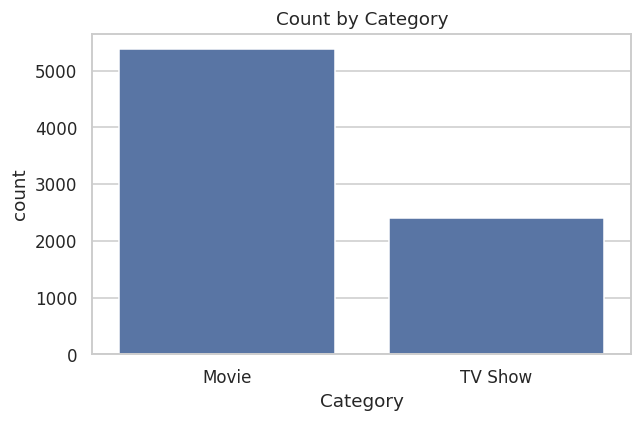

In [66]:
plt.figure(figsize=(6,4))
sns.countplot(x='Category', data=df)
plt.title('Count by Category')
plt.tight_layout()
plt.show()

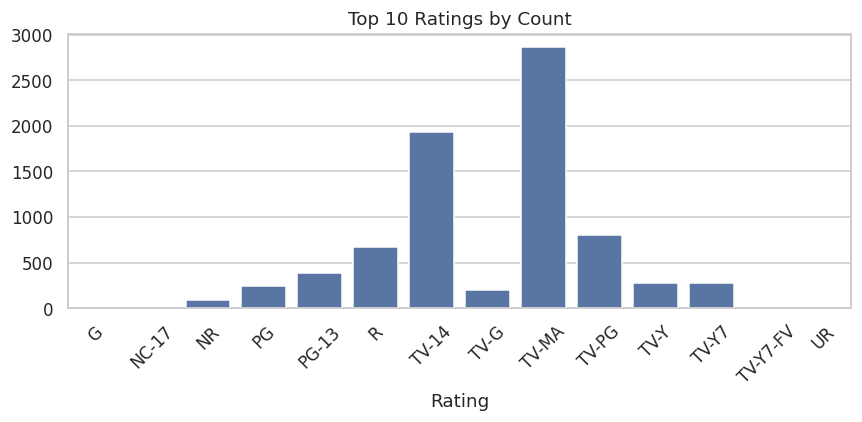

In [67]:
plt.figure(figsize=(8,4))
vc = df['Rating'].value_counts().head(10)
sns.barplot(x=vc.index, y=vc.values)
plt.xticks(rotation=45)
plt.title('Top 10 Ratings by Count')
plt.tight_layout()
plt.show()

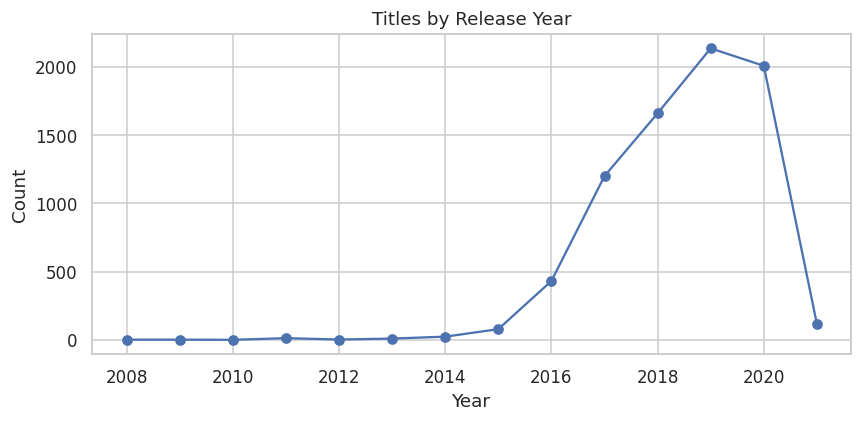

In [68]:
year_counts = df['Release_Year'].value_counts().sort_index()
plt.figure(figsize=(8,4))
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.title('Titles by Release Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


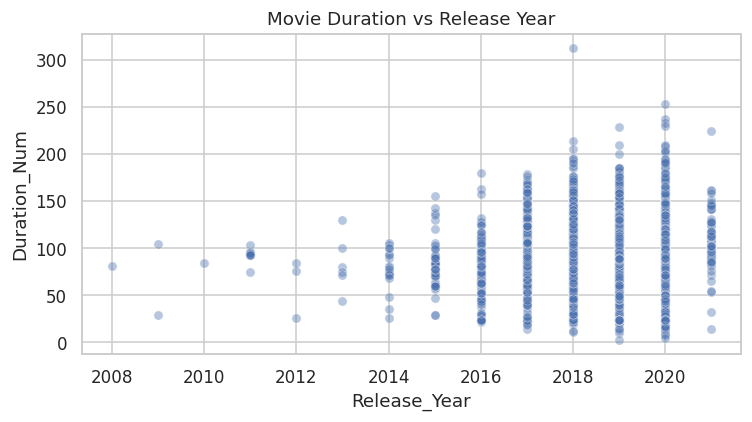

In [69]:
movies = df[df['Category'] == 'Movie'].dropna(subset=['Release_Year','Duration_Num'])
plt.figure(figsize=(7,4))
sns.scatterplot(x='Release_Year', y='Duration_Num', data=movies, alpha=0.4)
plt.title('Movie Duration vs Release Year')
plt.tight_layout()
plt.show()

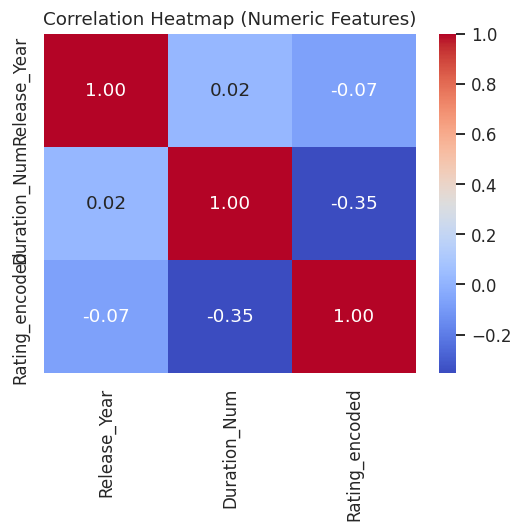

In [85]:
plt.figure(figsize=(5,5))
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Numeric Features)')
plt.tight_layout()
plt.show()

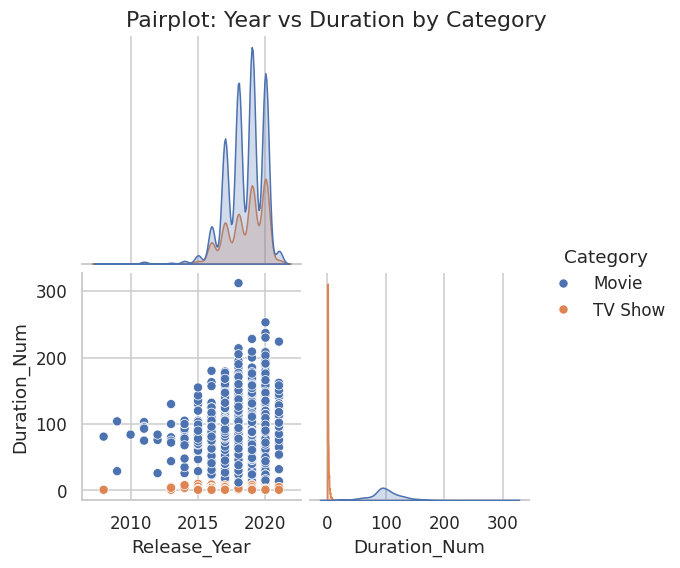

In [71]:
sns.pairplot(df, vars=['Release_Year','Duration_Num'], hue='Category', corner=True)
plt.suptitle('Pairplot: Year vs Duration by Category', y=1.02)
plt.show()


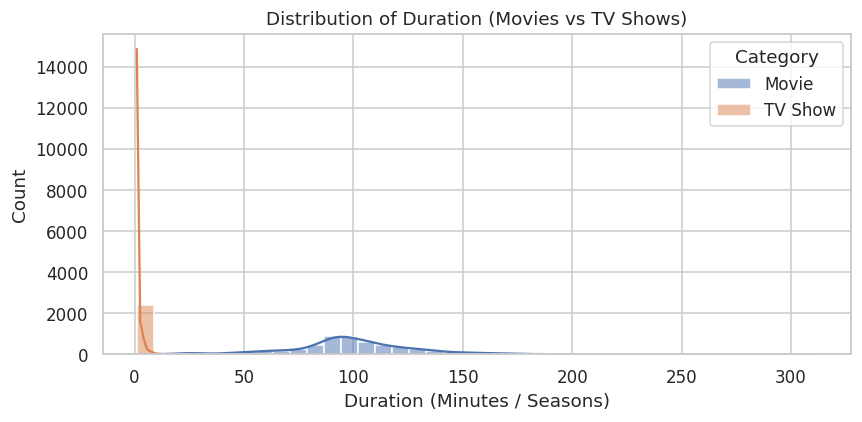

In [72]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='Duration_Num', hue='Category', bins=40, kde=True)
plt.title('Distribution of Duration (Movies vs TV Shows)')
plt.xlabel('Duration (Minutes / Seasons)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2444681917.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


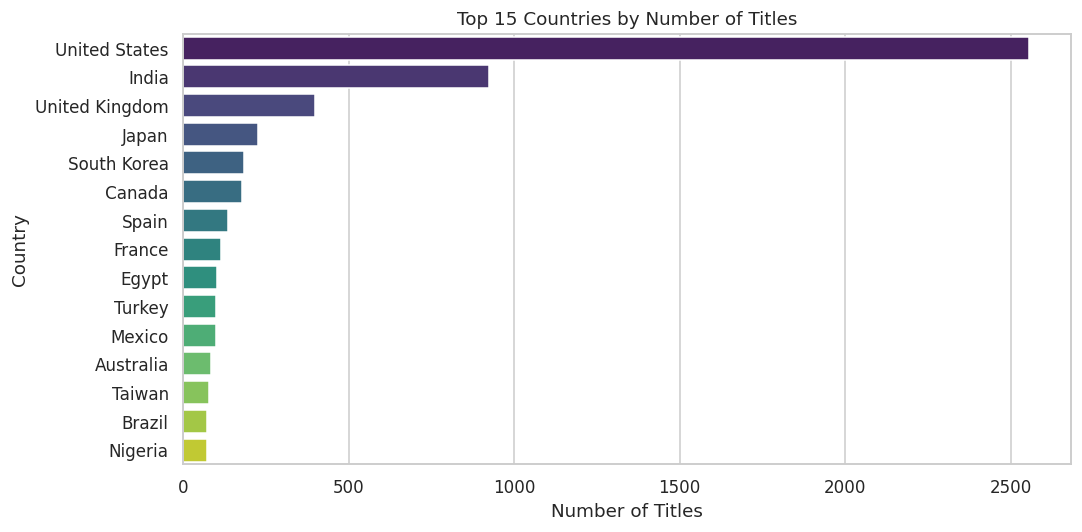

In [73]:
if 'Country' in df.columns:
    plt.figure(figsize=(10,5))
    top_countries = df['Country'].value_counts().head(15)
    sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
    plt.title('Top 15 Countries by Number of Titles')
    plt.xlabel('Number of Titles')
    plt.ylabel('Country')
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-4136533858.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend_df = df[df['Rating'].isin(top_ratings)].groupby(['Release_Year','Rating']).size().reset_index(name='Count')


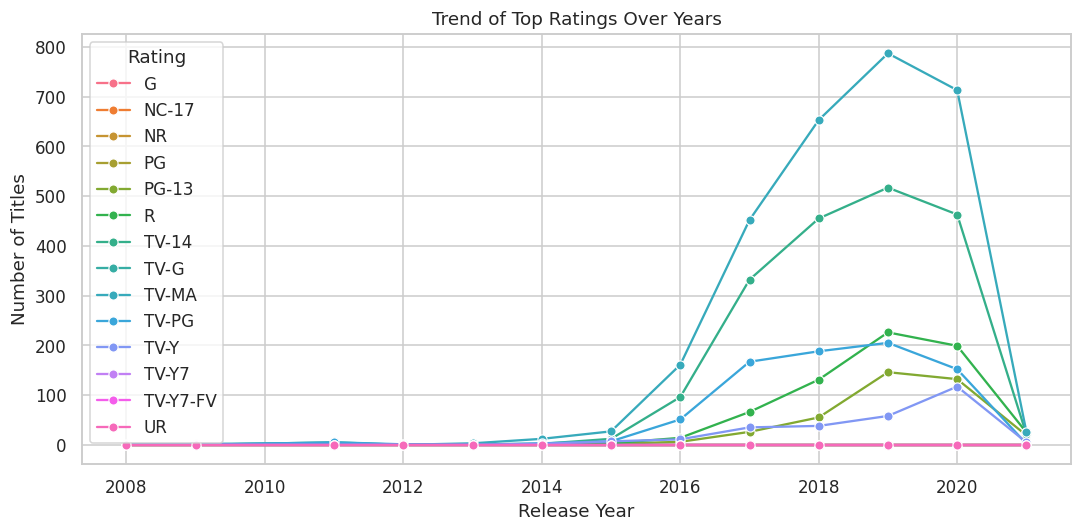

In [74]:
top_ratings = df['Rating'].value_counts().head(6).index
trend_df = df[df['Rating'].isin(top_ratings)].groupby(['Release_Year','Rating']).size().reset_index(name='Count')

plt.figure(figsize=(10,5))
sns.lineplot(data=trend_df, x='Release_Year', y='Count', hue='Rating', marker='o')
plt.title('Trend of Top Ratings Over Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()

In [75]:
if 'Rating_encoded' in df.columns:
    plt.figure(figsize=(7,5))
    sns.scatterplot(x='Rating_encoded', y='Duration_Num', hue='Category', data=df, alpha=0.5)
    plt.title('Scatter: Duration vs Encoded Rating')
    plt.tight_layout()
    plt.show()

In [76]:
# Check missing values
print("\nMissing values per column:")
print(df.isna().sum())


Missing values per column:
Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      98
Rating             7
Duration           0
Type               0
Description        0
Release_Year      98
Duration_Num       0
dtype: int64


In [77]:
# Fill missing numeric values with median
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill missing categorical values with mode
cat_cols = df.select_dtypes(include=['category', 'object']).columns
for c in cat_cols:
    df[c] = df[c].fillna(df[c].mode()[0])

print("\n Missing values handled successfully!")


 Missing values handled successfully!


In [78]:
def handle_outliers_iqr(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

for col in num_cols:
    handle_outliers_iqr(col)

print(" Outliers handled using IQR method")

 Outliers handled using IQR method


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Target encoding
df['Category_binary'] = df['Category'].apply(lambda x: 1 if x == 'Movie' else 0)

# Encode Rating (categorical → numeric)
le = LabelEncoder()
df['Rating_encoded'] = le.fit_transform(df['Rating'])

# Select features
features = ['Release_Year', 'Duration_Num', 'Rating_encoded']
target = 'Category_binary'

X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (5841, 3)
Test shape: (1948, 3)


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate both
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_rf = accuracy_score(y_test, y_pred_rf)

print("\n Model Accuracy:")
print(f"Logistic Regression: {acc_lr:.4f}")
print(f"Random Forest      : {acc_rf:.4f}")

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))


 Model Accuracy:
Logistic Regression: 0.9985
Random Forest      : 0.9985

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       603
           1       1.00      1.00      1.00      1345

    accuracy                           1.00      1948
   macro avg       1.00      1.00      1.00      1948
weighted avg       1.00      1.00      1.00      1948



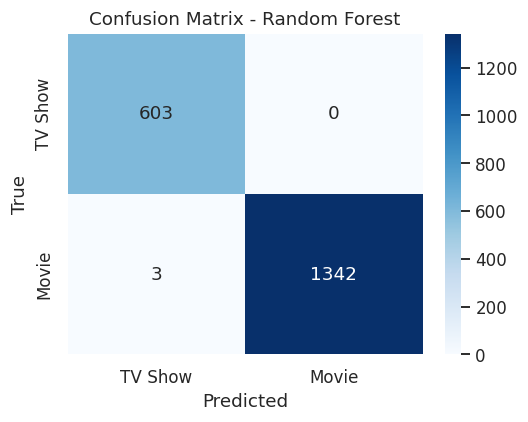

In [81]:
# Confusion matrix for Random Forest
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['TV Show','Movie'], yticklabels=['TV Show','Movie'])
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

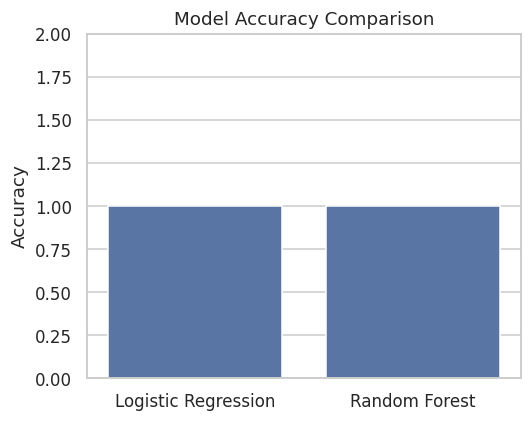

In [82]:
# Bar plot of model accuracies
plt.figure(figsize=(5,4))
sns.barplot(x=['Logistic Regression','Random Forest'], y=[acc_lr, acc_rf])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0,2)
plt.tight_layout()
plt.show()

In [83]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Example: compare true vs predicted values
y_true = y_test                # actual labels
y_pred = y_pred_rf             # predictions from your model (e.g. Random Forest)

# Accuracy Score
accuracy = accuracy_score(y_true, y_pred)
print(f" Model Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("\n Confusion Matrix:")
print(cm)

# Classification Report (Precision, Recall, F1-score)
print("\n Classification Report:")
print(classification_report(y_true, y_pred))


 Model Accuracy: 0.9985

 Confusion Matrix:
[[ 603    0]
 [   3 1342]]

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       603
           1       1.00      1.00      1.00      1345

    accuracy                           1.00      1948
   macro avg       1.00      1.00      1.00      1948
weighted avg       1.00      1.00      1.00      1948

